In [1]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof Tushar Sandhan, Department of Electrical Engineering, IIT Kanpur

Did you notice the slow speeds of the previous parts where lines and circles are detected using Hough Transform.

You can calculate run time of the previous codes using time() function in time module.

List atleast three reasons for the algorithm taking so much time.

In [2]:
reasons = """1. In case of Hough transform we are iterating whole theta range, but most of the theta values will not put significant effect on the result. 

2. In case of circle detection through Hough transform, allowed circle radius range is higher than the required range. 

3. After few iterations the accumulator values which are not increasing significantly is iterated again and again."""   #Replace ... by your reasons
print(reasons)

1. In case of Hough transform we are iterating whole theta range, but most of the theta values will not put significant effect on the result. 

2. In case of circle detection through Hough transform, allowed circle radius range is higher than the required range. 

3. After few iterations the accumulator values which are not increasing significantly is iterated again and again.


Suggest atleast two methods to speed up the algorithm.

In [3]:
methods = """1. Mid-Point Hough Transform method: In this method randomly two unequal edge point is chosen and their midpoint is calculated. If the midpoint is also edge point then 
rho and theta for all three points are calculated and if they are equal corresponding accumulator valus is increased. This is repeated until all edge points are covered. 

2. Using Convolutional approach: Using convolution gradient is determined for each eadge point and theta is varied around this gradient. It reduces time complexity and 
leads to correct Hough point in Hough space."""   #Replace ... by your methods
print(methods)

1. Mid-Point Hough Transform method: In this method randomly two unequal edge point is chosen and their midpoint is calculated. If the midpoint is also edge point then 
rho and theta for all three points are calculated and if they are equal corresponding accumulator valus is increased. This is repeated until all edge points are covered. 

2. Using Convolutional approach: Using convolution gradient is determined for each eadge point and theta is varied around this gradient. It reduces time complexity and 
leads to correct Hough point in Hough space.


Implement any one of the above methods on either line or circle detection code (your own code) and calculate the time taken by your method.

In [4]:
import numpy as np
import imageio
import math
import matplotlib.pyplot as plt
import time
import cv2

In [5]:
start = time.time()
img = imageio.imread('pic1.png')      

In [6]:
def line_detect_hough(img, angle_step=1, lines_are_white=True, value_threshold=5):
    
    """
    Input:

    img - 2-D binary image
    
    angle_step - Spacing between angles between -90 and 90 degrees. Default step is 1.

    lines_are_white - boolean indicating whether lines to be detected are white

    value_threshold - Pixel values above or below the value_threshold are edges

    Returns:
    
    accumulator - 2D array of the hough transform accumulator
    
    theta - Array of angles used in computation, in radians.
    
    rhos - Array of rho values. Max size is 2 times the diagonal
           distance of the input image.
    """

    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    num_thetas = len(thetas) 
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
    

    ####################################################
    # calculate cosine values and sine values of theta
    ####################################################

    cos_t = np.cos(thetas) 
    

    sin_t = np.sin(thetas) 
    

    ###########################
    # Hough accumulator array
    ###########################
    
    
    accumulator = np.zeros((2*diag_len, num_thetas), dtype=np.uint8)    
                                 
    
  
    #################################################################################################################
    # Finding where are black and white pixels and storing the indexes of the white edge pixels in x_idxs and y_idxs
    #################################################################################################################
    
    x_idxs = np.zeros((1,height*width))    
    y_idxs = np.zeros((1,height*width))      
    index = 0
    
    for i in range(height):
        for j in range(width):
            if(img[i,j] == 255):
                    x_idxs[0,index]=j
                    y_idxs[0,index]=i
                    index=index+1


    ############################################################################################
    # Applying Sobel filter and considering thetas only around gradient of corresponding pixels
    ############################################################################################
    
    Kx = np.array ([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  
  
    Ky = np.array ([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    Mx = cv2.filter2D(img,-1,Kx)
    
    My = cv2.filter2D(img,-1,Ky)
    
    t_h = np.arctan2(My, Mx) * 180 / np.pi
    
    for i in range(index):  
        phi = int(t_h[int(y_idxs[0,i]),int(x_idxs[0,i])])
        if(phi<-90):
            phi = phi + 180
        elif(phi>=90):
            phi = phi - 180
        for j in range(phi+89,phi+91):                                                       
            rho = diag_len + int(round(x_idxs[0,i] * cos_t[j] + y_idxs[0,i] * sin_t[j]))   
            accumulator[rho,j]=accumulator[rho,j]+1
                                       
                                      
                                       
    
    
    return accumulator, thetas, rhos

In [7]:
def display_hough(img, accumulator, thetas, rhos, save_path=None):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 20))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')


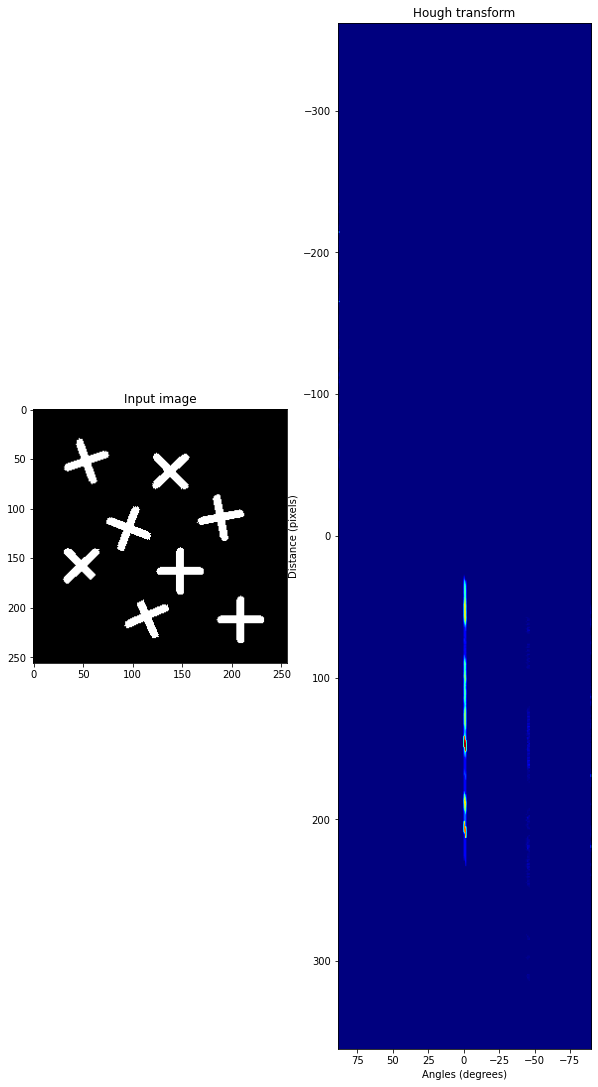

In [8]:
# Printing Input image and corresponding Hough transform

accumulator, thetas, rhos = line_detect_hough(img)
display_hough(img, accumulator, thetas, rhos)
end = time.time()

In [9]:
#Printing the run time for this code in seconds

print(f"Time taken by this method is {end - start}")

Time taken by this method is 0.3574402332305908


In [10]:
## Printing the maxima(s) in the accumulator and the rho,theta value(s) for which it occurs.

accumulator, thetas, rhos = line_detect_hough(img)
print('Maxima value:')
print(accumulator.max())

b,c = np.where(accumulator == accumulator.max())
print('Corresponding rho and theta')
print(b,thetas[c])

Maxima value:
66
Corresponding rho and theta
[508] [-0.01745329]
